# Average Realized return for each interval.


In [2]:
import pandas as pd
import numpy as np
import talib

In [3]:
def expected_return(df):
    return_hat = []
    short_hat = []
    #median_hat = []
    for i in range(5):
        temp = df[(df.signal_logistic == 1.0) & (df.logistic_prob > (0.5+0.1*i)) & (df.logistic_prob<=(0.6+0.1*i))]
        temp2 = df[(df.signal_logistic == -1.0) & (df.logistic_prob > (0.5+0.1*i)) & (df.logistic_prob<=(0.6+0.1*i))]
        return_hat.append(np.mean(temp["return"]))
        short_hat.append(-1*np.mean(temp2["return"]))
        #median_hat.append(np.std(temp['return']))
        
    return (return_hat,short_hat)

In [4]:
ticker = ['amzn', 'aapl',  'nvda', 'amd', 'msft', 'fb', 'nflx', 'goog', 'intc', 'pypl']
r = []
for i in ticker:
    data = pd.read_csv('C:/Users/wwwwwby/Documents/Columbia/4733 Algo Trading/project/signal/' + i +'_signal.csv')
    r.append(expected_return(data))

    

In [5]:
import matplotlib.pyplot as plt
from pylab import *

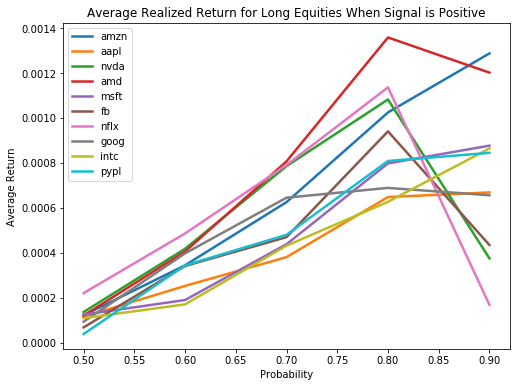

In [6]:
X = [0.5, 0.6, 0.7, 0.8, 0.9]
plt.rcParams['figure.figsize'] = (8.0, 6.0) 
for i in range(10):
    plot(X, r[i][0], linewidth=2.5, linestyle="-", label=ticker[i])


#legend(loc='upper left')
plt.title('Average Realized Return for Long Equities When Signal is Positive')
plt.xlabel('Probability')
plt.ylabel('Average Return')
plt.legend()
plt.show()

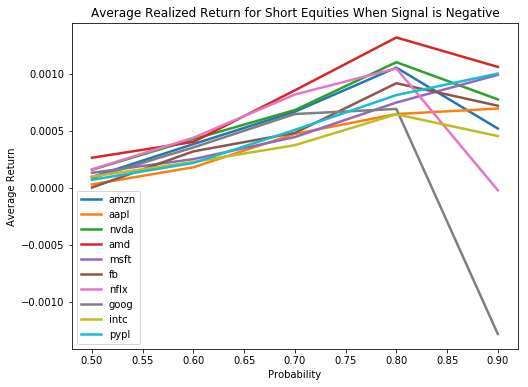

In [7]:
X = [0.5, 0.6, 0.7, 0.8, 0.9]
plt.rcParams['figure.figsize'] = (8.0, 6.0) 
for i in range(10):
    plot(X, r[i][1], linewidth=2.5, linestyle="-", label=ticker[i])


#legend(loc='upper left')
plt.title('Average Realized Return for Short Equities When Signal is Negative')
plt.xlabel('Probability')
plt.ylabel('Average Return')
legend(loc='lower left')
plt.legend()
plt.show()

In [8]:
ticker = ['amzn', 'aapl',  'nvda', 'amd', 'msft', 'fb', 'nflx', 'goog', 'intc', 'pypl']
r_new = []
for i in ticker:
    data = pd.read_csv('C:/Users/wwwwwby/Documents/Columbia/4733 Algo Trading/project/signal_new/' + i +'_signal.csv')
    r_new.append(expected_return(data))

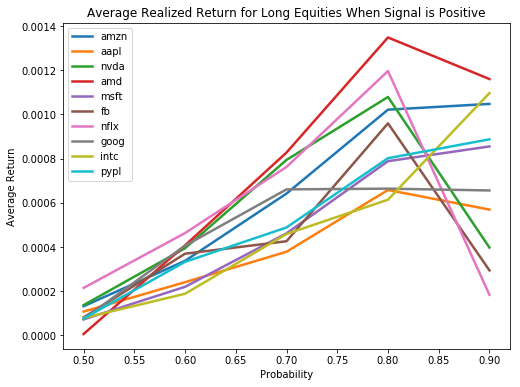

In [9]:
X = [0.5, 0.6, 0.7, 0.8, 0.9]
plt.rcParams['figure.figsize'] = (8.0, 6.0) 
for i in range(10):
    plot(X, r_new[i][0], linewidth=2.5, linestyle="-", label=ticker[i])


#legend(loc='upper left')
plt.title('Average Realized Return for Long Equities When Signal is Positive')
plt.xlabel('Probability')
plt.ylabel('Average Return')
plt.legend()
plt.show()

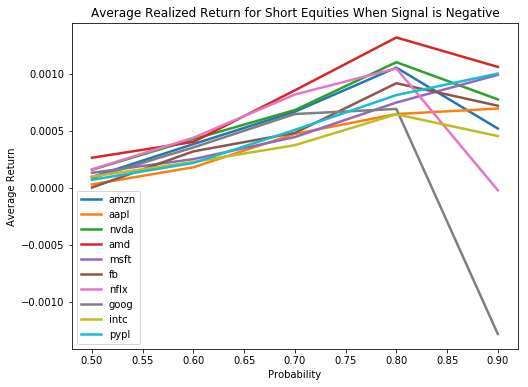

In [10]:
X = [0.5, 0.6, 0.7, 0.8, 0.9]
plt.rcParams['figure.figsize'] = (8.0, 6.0) 
for i in range(10):
    plot(X, r[i][1], linewidth=2.5, linestyle="-", label=ticker[i])


#legend(loc='upper left')
plt.title('Average Realized Return for Short Equities When Signal is Negative')
plt.xlabel('Probability')
plt.ylabel('Average Return')
legend(loc='lower left')
plt.legend()
plt.show()

In [11]:
### Define the function to locate signal in which interval and returnthe realized return 
def loc_return(r, direction = 1.0, signal =0.6):
    loc = int(signal*10) - 5
    if direction == 1.0:
        return r[0][loc]
    else:
        return r[1][loc]                  